In [23]:
# import all required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
# Merge datasets of up- and downregulated gene datasets
def merge_datasets(path_down, path_up, merged_df_path, rows, merged_rows, concatenated_path):
    # downregulated dataset
    down = pd.read_csv(path_down, sep="\t")
    down.columns = rows
    # upregulated dataset
    up = pd.read_csv(path_up, sep="\t")
    up.columns = rows
    new_df = pd.concat([down, up])
    
    # all samples
    new_df.to_csv(concatenated_path, sep="\t", index=False)
    
    # merged samples
    new_col_9107 = new_df.loc[: , rows[1]:rows[3]]
    new_col_91418 = new_df.loc[: , rows[4]:rows[6]]
    new_df[merged_rows[0]] = new_col_9107.mean(axis=1)
    new_df[merged_rows[1]] = new_col_91418.mean(axis=1)
    new_df = new_df.drop([rows[1], rows[2], rows[3], rows[4], rows[5], rows[6]], axis=1)
    new_df.to_csv(merged_df_path, sep="\t", index=False)

# Separate gene names
def prepare_data(file_path, condition_type):
    norm_genes = pd.read_csv(file_path, sep="\t")
    y_labels = norm_genes["Genes"].tolist()
    norm_genes["Genes"].to_csv("data/gene_ids_{}.csv".format(condition_type), index=False, header=None)
    norm_genes = norm_genes.drop(columns=['Genes'])
    return norm_genes, y_labels

In [25]:
# Mapping to Galaxy history
# htseq-count on data 343 and data 405 - BB1-PonA-9107
# htseq-count on data 343 and data 417 - BB2-PonA-9107
# htseq-count on data 343 and data 429 - J-PonA-9107
# htseq-count on data 343 and data 411 - BB1-PonA-91418
# htseq-count on data 343 and data 423 - BB2-PonA-91418
# htseq-count on data 343 and data 435 - J-PonA-91418

# The row names below should be changed according to the dataset being used
rows = ["Genes", "BB1-PonA-9107", "BB2-PonA-9107", "J-PonA-9107", "BB1-PonA-91418", "BB2-PonA-91418", "J-PonA-91418"]
merged_rows = ["PonA-9107", "PonA-91418"]
merged_path = "data/merged_df_pona_9107_91418.csv"
concatenated_path = "data/concatenated_df_PonA_9107_91418.csv"

merge_datasets("data/cut_downregulated_pona_9107_91418.tabular", "data/cut_upregulated_pona_9107_91418.tabular", 
               merged_path, rows, merged_rows, concatenated_path)

In [26]:
def plot_cluster_genes(dataframe, file_name, fig_title, y_labels):
    sns.set(font_scale=2.00)
    fig_size = (25,250)
    g = sns.clustermap(dataframe,
                   row_cluster=True,
                   col_cluster=True,
                   cmap="RdBu_r",
                   xticklabels='auto',
                   yticklabels=y_labels,
                   figsize=fig_size,
                   metric='cosine',
                   standard_scale=0
                  )
    g.fig.suptitle(fig_title)
    g.ax_heatmap.set_xlabel("Samples")
    g.ax_heatmap.set_ylabel("Genes")

    for a in g.ax_col_dendrogram.collections:
        a.set_linewidth(3)

    for a in g.ax_row_dendrogram.collections:
        a.set_linewidth(3)
        
    g.savefig('{}.pdf'.format(file_name), dpi=150)
    #g.savefig('{}.png'.format(file_name), dpi=150)

## Plots for PonA-9107-91418

### Concatenated

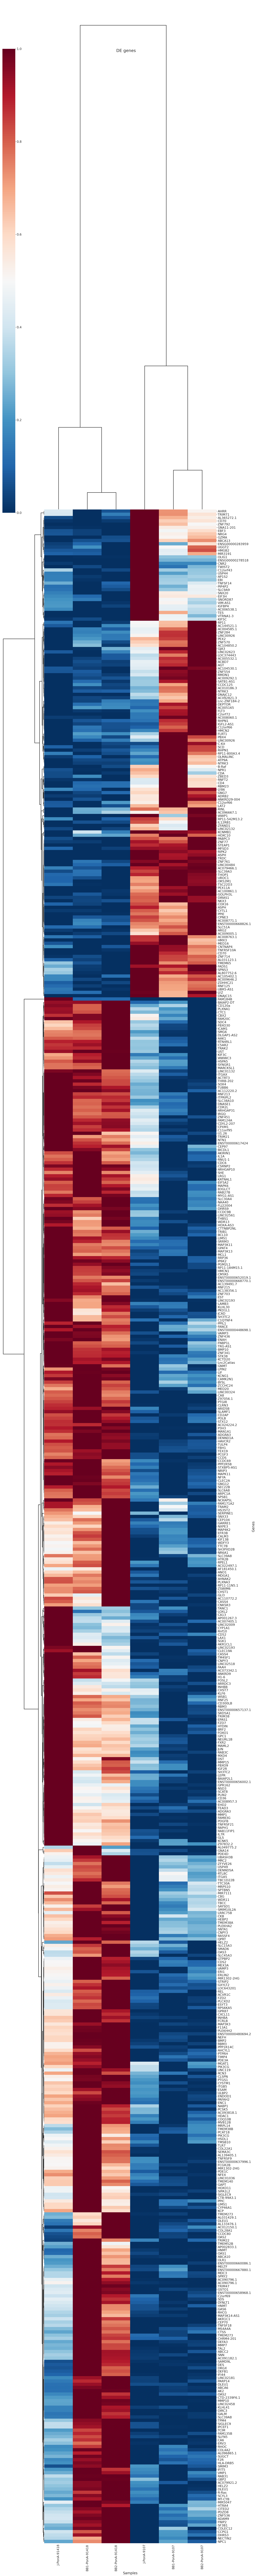

In [27]:
# get gene names
gene_counts, y_labels = prepare_data(concatenated_path, "PonA-9107-91418")

# read gene names
gene_names_df = pd.read_csv("data/gene_ids_name_mapping_PonA-9107-91418.csv", sep="\t", header=None)

gene_names = gene_names_df[1].tolist()

gene_names = [item.strip() for item in gene_names]

# plot cluster heatmap for PonA
plot_cluster_genes(gene_counts, "plots/concatenated_clustered_heatmap_PonA-9107-91418", 'DE genes', gene_names)

### Sampled merged

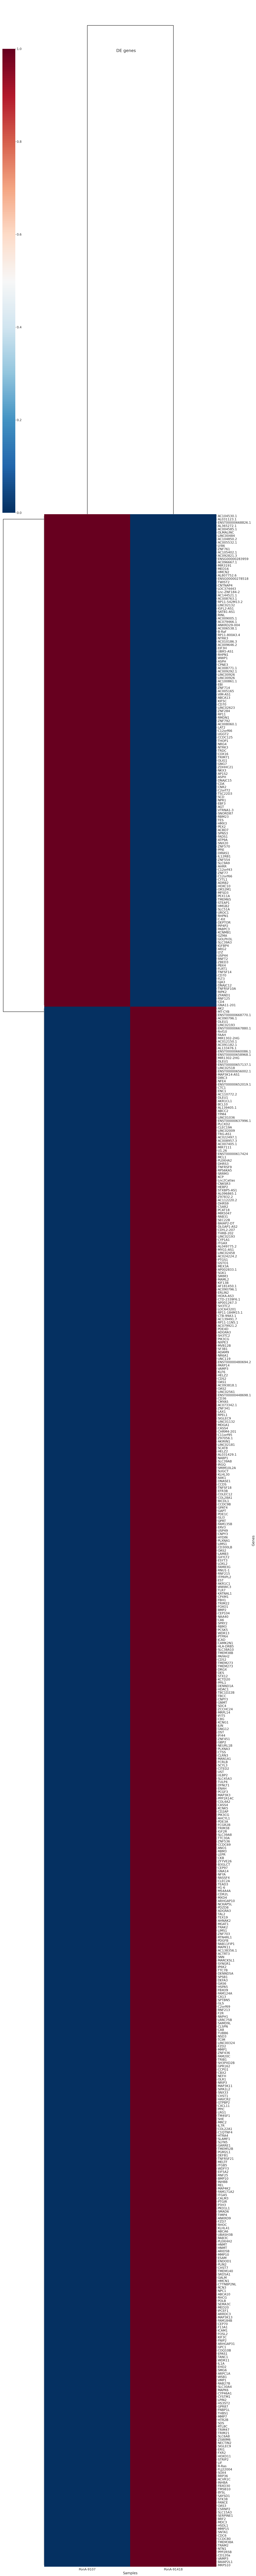

In [28]:
gene_counts, y_labels = prepare_data(merged_path, "PonA-9107-91418")

# read gene names
gene_names_df = pd.read_csv("data/gene_ids_name_mapping_PonA-9107-91418.csv", sep="\t", header=None)

gene_names = gene_names_df[1].tolist()

gene_names = [item.strip() for item in gene_names]

# plot cluster heatmap for PonA
plot_cluster_genes(gene_counts, "plots/merged_clustered_heatmap_PonA-9107-91418", 'DE genes', gene_names)

## Plots for PonA-EtOH-91418

In [6]:
# TODO : Plot for ETOH
# htseq-count on data 343 and data 408 - BB1-EtoH-91418
# htseq-count on data 343 and data 420 - BB2-EtoH-91418
# htseq-count on data 343 and data 432 - J-EtoH-91418
# htseq-count on data 343 and data 411 - BB1-PonA-91418
# htseq-count on data 343 and data 423 - BB2-PonA-91418
# htseq-count on data 343 and data 435 - J-PonA-91418
#merged_rows = ["EtoH-91418", "PonA-91418"]
#merged_df_pona = merge_datasets("data/cut_downregulated_pona_etoh_91418.tabular", 
#                                "data/cut_upregulated_pona_etoh_91418.tabular",
#                                "data/merged_df_pona_etoh_91418.csv",                               
#                               ["Genes", "BB1-EtoH-91418", "BB2-EtoH-91418", "J-EtoH-91418", "BB1-PonA-91418", "BB2-PonA-91418", "J-PonA-91418"])



rows = ["Genes", "BB1-EtoH-91418", "BB2-EtoH-91418", "J-EtoH-91418", "BB1-PonA-91418", "BB2-PonA-91418", "J-PonA-91418"]
merged_rows = ["EtoH-91418", "PonA-91418"]
merged_path = "data/merged_df_pona_etoh_91418.csv"
concatenated_path = "data/concatenated_df_PonA_EtOH_91418.csv"

merge_datasets("data/cut_downregulated_pona_etoh_91418.tabular", "data/cut_upregulated_pona_etoh_91418.tabular",
               merged_path, rows, merged_rows, concatenated_path)

###  Concatenated

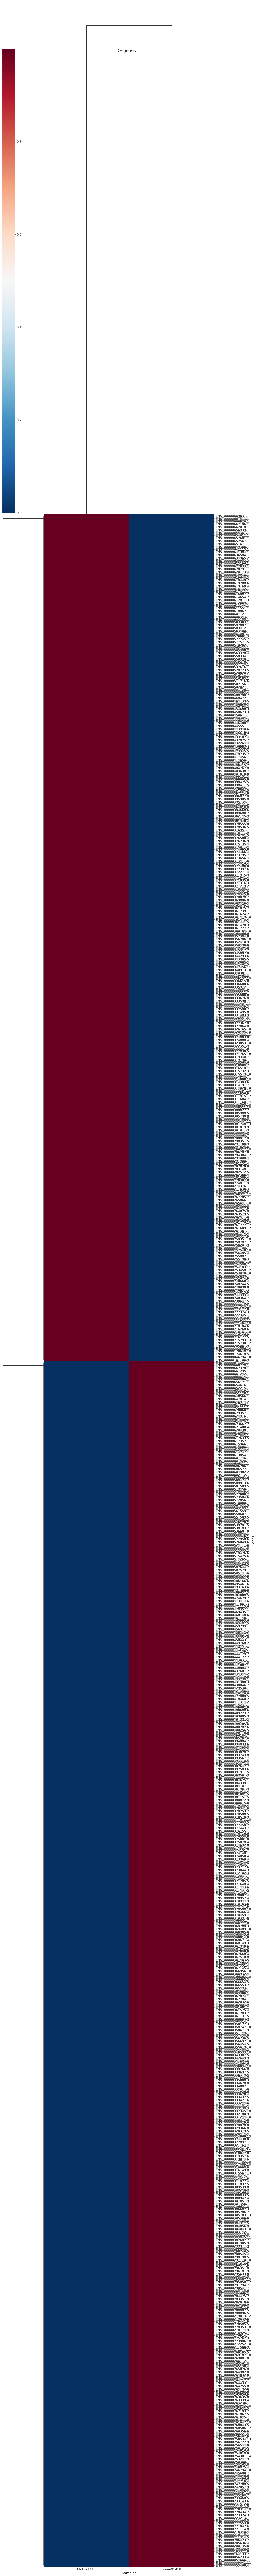

In [92]:
# get gene names
gene_counts, y_labels = prepare_data(concatenated_path, "PonA-EtoH-91418")

# read gene names
# TODO: Please uncomment these lines if mapping between ids and names are available

#gene_names_df = pd.read_csv("data/gene_ids_name_mapping_EtOH-PonA-91418.csv", sep="\t", header=None)
#gene_names = gene_names_df[1].tolist()
#gene_names = [item.strip() for item in gene_names]

# TODO: If gene names are available in file gene_ids_name_mapping_EtOH-PonA-91418.csv, 
# y_labels variable in the following function call should be replaced by gene_names


plot_cluster_genes(gene_counts, "plots/concatenated_clustered_heatmap_PonA-EtoH-91418", 'DE genes', y_labels)

###  Samples merged

In [ ]:
# get gene names
gene_counts, y_labels = prepare_data(merged_path, "PonA-EtoH-91418")

# read gene names
# TODO: Please uncomment these lines if mapping between ids and names are available

#gene_names_df = pd.read_csv("data/gene_ids_name_mapping_EtOH-PonA-91418.csv", sep="\t", header=None)
#gene_names = gene_names_df[1].tolist()
#gene_names = [item.strip() for item in gene_names]

# TODO: If gene names are available in file gene_ids_name_mapping_EtOH-PonA-91418.csv, 
# y_labels variable in the following function call should be replaced by gene_names


plot_cluster_genes(gene_counts, "plots/merged_clustered_heatmap_PonA-EtoH-91418", 'DE genes', y_labels)